<a href="https://colab.research.google.com/github/VanshShah98/Coconut-Analyzer/blob/main/coconut_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

In [ ]:
data_train_path='/content/drive/MyDrive/dataset_pro/train-20240910T151506Z-001/train'
data_val_path='/content/drive/MyDrive/dataset_pro/train-20240910T151506Z-001/validation'

In [ ]:
img_height=180
img_width=180

In [ ]:
data_train=tf.keras.utils.image_dataset_from_directory(data_train_path,image_size=(img_width,img_height),shuffle=True,batch_size=32,
                                                       validation_split=False)
data_val=tf.keras.utils.image_dataset_from_directory(data_val_path,image_size=(img_width,img_height),shuffle=False,batch_size=32,
                                                            validation_split=False)

Found 37 files belonging to 3 classes.
Found 37 files belonging to 3 classes.


In [ ]:
data_cat=data_train.class_names
data_val_cat=data_val.class_names
print(data_cat)
print(data_val_cat)

['50_', 'Empty', 'Full']
['50_', 'Empty', 'Full']


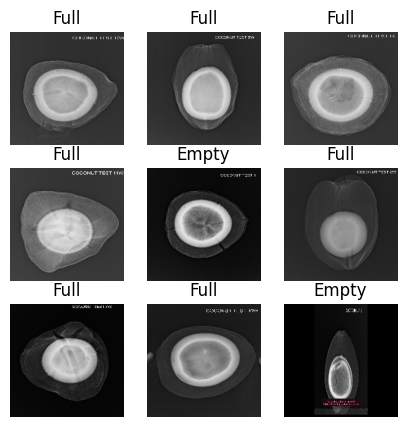

In [ ]:
plt.figure(figsize=(5,5))
for image,labels in data_train.take(1):
  for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(data_cat[labels[i]])
    plt.axis('off')

In [ ]:
model=Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.25),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
history=model.fit(data_train,validation_data=data_val,epochs=25,batch_size=32,verbose=1)

Epoch 1/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 1.0000 - loss: 0.0078 - val_accuracy: 1.0000 - val_loss: 0.0062
Epoch 2/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 1.0000 - loss: 0.0071 - val_accuracy: 1.0000 - val_loss: 0.0062
Epoch 3/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 1.0000 - loss: 0.0069 - val_accuracy: 1.0000 - val_loss: 0.0042
Epoch 4/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 1.0000 - loss: 0.0051 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 5/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 6/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 7/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 8/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 9/25
2/2 ━

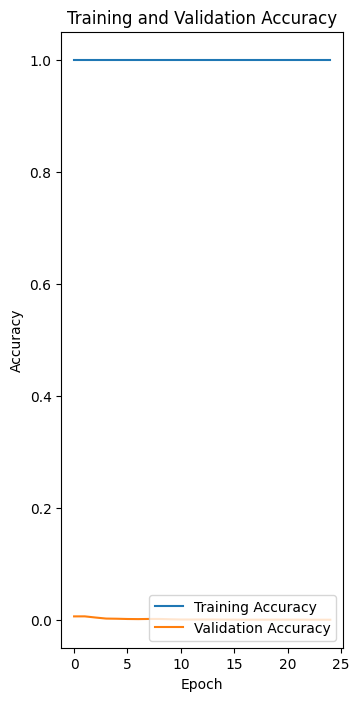

In [ ]:
epochs_range=range(25)
plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['accuracy'],label='Training Accuracy')
plt.plot(epochs_range,history.history['val_loss'],label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

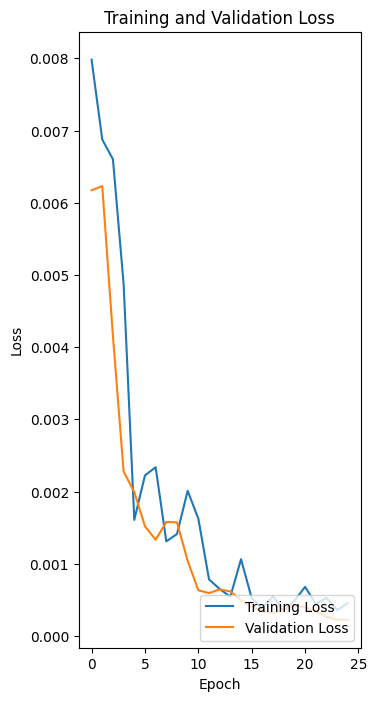

In [ ]:
epochs_range=range(25)
plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label='Training Loss')
plt.plot(epochs_range,history.history['val_loss'],label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
image_path='/content/drive/MyDrive/dataset_pro/train-20240910T151506Z-001/test/Empty307 (2).jpg'
image=tf.keras.utils.load_img(image_path,target_size=(img_width,img_height))
img_arr=tf.keras.utils.img_to_array(image)
img_bat=tf.expand_dims(img_arr,0)

In [ ]:
predict=model.predict(img_bat)
score=tf.nn.softmax(predict)
print('image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)], np.max(score)*100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
image is Empty with accuracy of 100.00


In [ ]:
model.save('coconut.keras')